# Recitation 2
### 23.Sep.22
#### Mariana Martínez Aguilar

The objective of today's recitation is to explore how to build a solver for a nonlinear least squares problem using Gauss Newton.

## Nonlinear least squares problem

Suppose someone gives us the Michaelis–Menten model for enzyme kinetics:

$$ y = f(x, a, b) = \frac{ax}{b + x}. $$

In this model $x$ is the input and we want to estimate the parameters $a$ and $b$ given certain N observations $y$.

### Inspection the model
#### a) Plot the true solution 
In this case we know the values of the optimal $a$ and $b$ but right now we want to explore how this function looks. Generate a plot of the function with $0 \leq x \leq 100$ and the optimal parameters.

<function matplotlib.pyplot.show(close=None, block=None)>

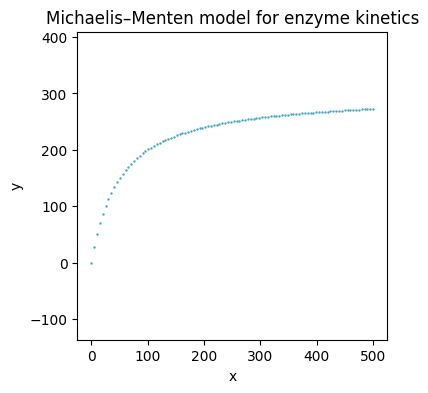

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def kin(x, a, b):
    '''
    Logistic function
    '''
    return np.divide( a*x, b + x )

# We know the true values of k and x0. We generate 100 points in the interval -1, 1
x = np.linspace(0, 500, 100)
a = 300
b = 50

y = kin(x, a, b)

plt.figure(figsize = (4, 4))
plt.axis('equal')
# Plot them in a color we like with points as markers
plt.scatter(x, y, s = 2, c = "#41a6bd", marker = '.')
plt.title("Michaelis–Menten model for enzyme kinetics")
plt.xlabel("x")
plt.ylabel("y")
plt.show

Let $c = (a, b)^\top$ be the vector of parameters and recall Gauss Newton:
$$ c_{n+1} = c_n + \left( Df(c_n)^\top Df(c_n) \right)^{-1}Df(c_n)^\top \left( y - f(c_n) \right) $$

With $N$ number of observations $y$, what is the correct size of the $Df(c_n)$ matrix? Then, what is the correct size of this matrix $\left( Df(c_n)^\top Df(c_n) \right)^{-1}$?  

Let N = 100 as before, program Gauss-Newton method to fit the true observations (the ones we found in the line above).

What are the "ingredients" we need for Gauss-Newton?
   - Jacobian matrix Df(c_n)
   - Initial point, in our case is a point $c_0 = (a_0, b_0)^\top$
   - Some points x (of size N) and some observations y (of size N as well)

In [2]:
# We need to compute the Jacobian matrix Df(cn). First compute this by hand
# and then define a function that implements this on Python

from numpy.linalg import norm, inv

def computeDf(c, x):
    '''
    This computes the jacobian matrix Df given a vector of 
    possible parameters c and a vector of observations x
    c[0] = a
    c[1] = b
    '''
    Df = np.zeros((len(x), len(c))) # Check that this is correct
    Df[:, 0] = np.divide( x, c[1] + x )
    Df[:, 1] = np.divide( -c[0]*x, np.power(c[1] + x, 2)   )
    return Df

def GaussNewton(c0, x, y):
    '''
    Gauss Newton method to fit the Michaelis–Menten model for enzyme kinetics
    given some observations y
    and a starting guess to the parameters c0
    '''
    maxIter = 1000  # a good idea for methods like this one is to set a maximum number of iterations allowed
    tol = 1e-2 # another good idea for methods like this is to set a tolerance
    Df = computeDf(c0, x) # initial jacobian matrix
    f = kin(x, *c0.T) # f(c0)
    res = y - f # residuals from the initial point
    i = 1 # number of iterations done so far
    c = c0
    while(  norm( np.matmul(Df.T, res)  ) > tol and i < maxIter  ):
        # We want to iterate until we get a "good" approximation to the true parameters
        c = c + np.matmul( inv( np.matmul(Df.T, Df) ) , np.matmul(Df.T, np.subtract(y, f) )  )
        # Update Df, f, res, i
        Df = computeDf(c, x)
        f = kin(x, *c.T)
        res = y - f
        i += 1
    return c, i, res
x = np.linspace(-1, 1, 100)
y = kin(x, a, b)
c0 = np.array( [500, 70] )

c, i, res = GaussNewton(c0, x, y)
print("Parameters found with Gauss-Newton: ", c)
print("Number of iterations done ", i)

Parameters found with Gauss-Newton:  [299.99878017  49.99908753]
Number of iterations done  4


Compute a plot on the reduction of the residuals at each iteration. Change the tolerance to $10^{-15}$.

<function matplotlib.pyplot.show(close=None, block=None)>

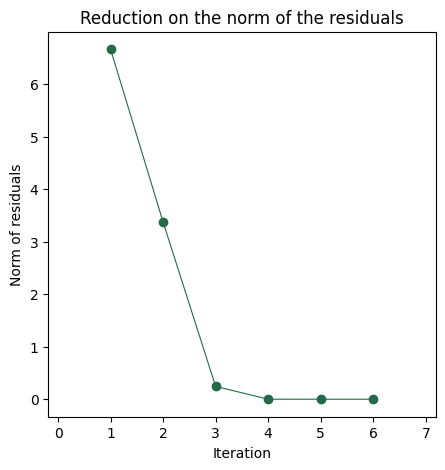

In [3]:
# We can change the Gauss-Newton method so that we get a vector of the norm of the residuals

def GaussNewton(c0, x, y):
    '''
    Gauss Newton method to fit the Michaelis–Menten model for enzyme kinetics
    given some observations y
    and a starting guess to the parameters c0
    '''
    maxIter = 1000  # a good idea for methods like this one is to set a maximum number of iterations allowed
    tol = 1e-15 # another good idea for methods like this is to set a tolerance
    Df = computeDf(c0, x) # initial jacobian matrix
    f = kin(x, *c0.T) # f(c0)
    res = y - f # residuals from the initial point
    res_norms = [norm(res)]
    i = 1 # number of iterations done so far
    c = c0
    while(  norm( np.matmul(Df.T, res)  ) > tol and i < maxIter  ):
        # We want to iterate until we get a "good" approximation to the true parameters
        c = c + np.matmul( inv( np.matmul(Df.T, Df) ) , np.matmul(Df.T, np.subtract(y, f) )  )
        # Update Df, f, res, i
        Df = computeDf(c, x)
        f = kin(x, *c.T)
        res = y - f
        res_norms += [norm(res)]
        i += 1
    return c, i, res, res_norms

x = np.linspace(-1, 1, 100)
y = kin(x, a, b)
c0 = np.array( [500, 70] )

c, i, res, res_norms = GaussNewton(c0, x, y)

plt.figure(figsize = (5,5))
plt.plot(range(1, i+1), res_norms, marker = 'o', linewidth = 0.8, color = "#236a48")
plt.title("Reduction on the norm of the residuals")
plt.xlabel("Iteration")
plt.ylabel("Norm of residuals")
plt.axis('equal')
plt.show

Notice that it is difficult to see the decrease in the last iterations. Change the y axis to a logarithmic scale.

<function matplotlib.pyplot.show(close=None, block=None)>

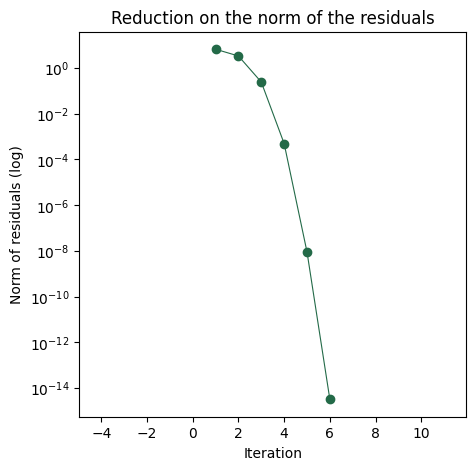

In [4]:
plt.figure(figsize = (5,5))
plt.plot(range(1, i+1), res_norms, marker = 'o', linewidth = 0.8, color = "#236a48")
plt.title("Reduction on the norm of the residuals")
plt.xlabel("Iteration")
plt.ylabel("Norm of residuals (log)")
plt.axis('equal')
ax = plt.gca()
ax.set_yscale('log')
plt.show

Change the initial parameters. What happens when the initial parameters are too far away from the exact ones?

In [5]:
# Try the following initial points, see what happens

c0_s = np.array( ( [10, 5], [600, 10], [200, 70], [700, 200]) )
for c0 in c0_s:
    print("\n\nFor the initial points:  ", c0)
    c, i, res, res_norms = GaussNewton(c0, x, y)
    print("The optimal parameters found:  ", c, "  in  ", i, "  iterations  ")
    print("The norm of the residuals is:  ", norm(res))



For the initial points:   [10  5]
The optimal parameters found:   [300.  50.]   in   8   iterations  
The norm of the residuals is:   3.214977577765888e-15


For the initial points:   [600  10]
The optimal parameters found:   [300.  50.]   in   10   iterations  
The norm of the residuals is:   3.574560940806562e-15


For the initial points:   [200  70]
The optimal parameters found:   [300.  50.]   in   12   iterations  
The norm of the residuals is:   2.936980598322289e-15


For the initial points:   [700 200]
The optimal parameters found:   [1.71913064e+14 2.20709875e+14]   in   1000   iterations  
The norm of the residuals is:   30.460432662520596
